# Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: C:\Users\TanviBhalera_0a56tn2\Desktop\DSML\Scaler\5. Python Libraries\Business Case - Netflix\netflix.csv

  0%|          | 0.00/3.40M [00:00<?, ?B/s]
 31%|###       | 1.05M/3.40M [00:00<00:00, 9.12MB/s]
 62%|######1   | 2.10M/3.40M [00:00<00:00, 6.45MB/s]
 93%|#########2| 3.15M/3.40M [00:00<00:00, 6.08MB/s]
100%|##########| 3.40M/3.40M [00:00<00:00, 6.32MB/s]


In [3]:
df = pd.read_csv('netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Data Preprocessing and cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Observations:**
- There is 8807 number of records in the data for 12 number of features.
- There must be some null values ad some column shows less number of non-null count
- The **data type** of all the columns is appropriate except the **'date_added'** column. It's data type should be **datetime64[ns]**.

In [5]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.dtypes['date_added']

dtype('<M8[ns]')

#### Checking of duplicate values

In [6]:
df.loc[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


We are not getting any duplicate record here. Let's find out if there is any duplicate 'descriptiion' is there or not.

In [7]:
df.loc[df['description'].duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
79,s80,Movie,Tughlaq Durbar (Telugu),Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",NaN,2021-09-11,2021,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
237,s238,Movie,Boomika (Hindi),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",NaN,2021-08-23,2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
238,s239,Movie,Boomika (Malayalam),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",NaN,2021-08-23,2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
239,s240,Movie,Boomika (Telugu),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",NaN,2021-08-23,2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
851,s852,Movie,99 Songs (Tamil),NaN,NaN,NaN,2021-05-21,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
852,s853,Movie,99 Songs (Telugu),NaN,NaN,NaN,2021-05-21,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
1653,s1654,Movie,Andhakaaram,V Vignarajan,"Vinoth Kishan, Arjun Das, Pooja Ramachandran, ...",India,2020-11-24,2020,TV-14,171 min,"Horror Movies, International Movies, Thrillers","As a blind librarian, dispirited cricketer and..."
1986,s1987,Movie,Nee Enge En Anbe,Sekhar Kammula,"Nayantara, Vaibhav Reddy, Pasupathy, Harshvard...",NaN,2020-09-17,2014,TV-14,137 min,"International Movies, Thrillers",As a woman scours Hyderabad for her missing hu...
2335,s2336,Movie,Seven (Telugu),NaN,NaN,NaN,2020-06-26,2019,TV-14,116 min,"Dramas, International Movies, Romantic Movies",Multiple women report their husbands as missin...
2873,s2874,Movie,Ala Vaikunthapurramuloo,Trivikram Srinivas,"Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...",India,2020-02-27,2020,TV-14,162 min,"Action & Adventure, Comedies, Dramas",After growing up enduring criticism from his f...


The above result is showing that there is different versions of the same movie/show in different languages which is a duplicate data only. This will affect our data analysis. Let's remove the duplicated data. 

In [8]:
df['title']=df['title'].str.replace(r"\(.*\)","")

C:\Users\TanviBhalera_0a56tn2\AppData\Local\Temp\ipykernel_1512\2841677773.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title']=df['title'].str.replace(r"\(.*\)","")


In [9]:
df.loc[df['description'].duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
79,s80,Movie,Tughlaq Durbar,Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",NaN,2021-09-11,2021,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
237,s238,Movie,Boomika,Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",NaN,2021-08-23,2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
238,s239,Movie,Boomika,Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",NaN,2021-08-23,2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
239,s240,Movie,Boomika,Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",NaN,2021-08-23,2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
851,s852,Movie,99 Songs,NaN,NaN,NaN,2021-05-21,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
852,s853,Movie,99 Songs,NaN,NaN,NaN,2021-05-21,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
1653,s1654,Movie,Andhakaaram,V Vignarajan,"Vinoth Kishan, Arjun Das, Pooja Ramachandran, ...",India,2020-11-24,2020,TV-14,171 min,"Horror Movies, International Movies, Thrillers","As a blind librarian, dispirited cricketer and..."
1986,s1987,Movie,Nee Enge En Anbe,Sekhar Kammula,"Nayantara, Vaibhav Reddy, Pasupathy, Harshvard...",NaN,2020-09-17,2014,TV-14,137 min,"International Movies, Thrillers",As a woman scours Hyderabad for her missing hu...
2335,s2336,Movie,Seven,NaN,NaN,NaN,2020-06-26,2019,TV-14,116 min,"Dramas, International Movies, Romantic Movies",Multiple women report their husbands as missin...
2873,s2874,Movie,Ala Vaikunthapurramuloo,Trivikram Srinivas,"Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...",India,2020-02-27,2020,TV-14,162 min,"Action & Adventure, Comedies, Dramas",After growing up enduring criticism from his f...


In [10]:
# Here we're not getting any duplicated values because the show_id are different for movie/show with same content.
df = df.drop_duplicates(subset=df.columns.difference(['show_id']))

#### Handling the null values

In [11]:
df.isna().sum()

show_id            0
type               0
title              0
director        2633
cast             824
country          827
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
dur_df = df.loc[df['duration'].isna()]
dur_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Here, the values of the 'duration' column are misplaced to the 'rating' column. Let's shift them back to the 'duration' column.

In [13]:
df.loc[df.duration.isnull(),'duration']=df.loc[df.duration.isnull(),'duration'].fillna(df['rating'])
df.loc[df['rating'].str.contains('min', na=False),'rating']='NR'

In [14]:
df.isna().mean()

show_id         0.000000
type            0.000000
title           0.000000
director        0.299103
cast            0.093604
country         0.093945
date_added      0.001136
release_year    0.000000
rating          0.000454
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

**Observations:**

- There are major number of values missing for director, cast and country. 
- 'director' contains major share of the missing values i.e. 30% which is large no. of data and it is difficult to omit it. 
- 'cast' and 'country' also contains approximately 10% of the data.
- 'date_added' and 'rating' contains very small amount of data, so we can drop them

In [15]:
df.loc[df.director.isnull(), 'director'] = df['director'].fillna('Unknown Director')
df.loc[df.cast.isnull(), 'cast'] = df['cast'].fillna('Unknown Actor')
df.loc[df.country.isnull(), 'country'] = df['country'].fillna('Unknown Country')

In [16]:
df.dropna(subset=['date_added', 'rating'], inplace = True)

C:\Users\TanviBhalera_0a56tn2\AppData\Local\Temp\ipykernel_1512\882999293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['date_added', 'rating'], inplace = True)


In [17]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
df.describe(include='all').T


C:\Users\TanviBhalera_0a56tn2\AppData\Local\Temp\ipykernel_1512\1410410848.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
show_id,8789,8789,s1,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8789,2,Movie,6125,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8789,8777,Baahubali: The Beginning,4,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,8789,4528,Unknown Director,2620,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,8789,7680,Unknown Actor,824,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,8789,749,United States,2812,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8789,1713,2020-01-01 00:00:00,110,2008-01-01,2021-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8789.0,NaN,NaN,NaN,NaT,NaT,2014.180225,8.825088,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8789,14,TV-MA,3205,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8789,220,1 Season,1791,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.loc[:,'week_added'] = pd.factorize(df['date_added'].dt.isocalendar().week)[0] + 1
df.loc[:, 'month_added'] = df['date_added'].dt.month_name()
df.loc[:, 'year_added'] = df['date_added'].dt.year
df.head()

C:\Users\TanviBhalera_0a56tn2\AppData\Local\Temp\ipykernel_1512\3005558382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'week_added'] = pd.factorize(df['date_added'].dt.isocalendar().week)[0] + 1
C:\Users\TanviBhalera_0a56tn2\AppData\Local\Temp\ipykernel_1512\3005558382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'month_added'] = df['date_added'].dt.month_name()
C:\Users\TanviBhalera_0a56tn2\AppData\Local\Temp\ipykernel_1512\3005558382.py:3: SettingWithCopyWarning: 
A value

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,September,2021
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,September,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,September,2021
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1,September,2021


### 4. Un-nesting the comma separated data

Few of the columns such as **'director', 'cast', 'country', and 'listed_in'** contains the multiple values. It would be good if we separate the nested data and keep the separate record for it in order to make the analysis easier.

In [20]:
df.loc[:, 'director'] = df['director'].str.split(', ')
df.loc[:, 'cast'] = df['cast'].str.split(', ')
df.loc[:, 'country'] = df['country'].str.split(', ')
df.loc[:, 'listed_in'] = df['listed_in'].str.split(', ')

C:\Users\TanviBhalera_0a56tn2\AppData\Local\Temp\ipykernel_1512\344545065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'director'] = df['director'].str.split(', ')
C:\Users\TanviBhalera_0a56tn2\AppData\Local\Temp\ipykernel_1512\344545065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'cast'] = df['cast'].str.split(', ')
C:\Users\TanviBhalera_0a56tn2\AppData\Local\Temp\ipykernel_1512\344545065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [21]:
df = df.explode('director', ignore_index = True)

In [22]:
df = df.explode('cast', ignore_index = True)

In [23]:
df = df.explode('country', ignore_index = True)

In [24]:
df = df.explode('listed_in', ignore_index = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,September,2021
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",1,September,2021
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",1,September,2021
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",1,September,2021
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",1,September,2021


In [25]:
df.shape

(201697, 15)

In [26]:
#Separating the data for type - Movie and TV show
df_movie = df.loc[df.type == 'Movie']
df_tv = df.loc[df.type == 'TV Show']

In [27]:
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,September,2021
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,September,2021
160,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,September,2021
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,September,2021
162,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,September,2021


### Duration of the shows

**Observations**
- For TV Shows, duration contain seasons.
- For movies, duration contain number of minutes. 
- For movies duration is varying with the diference of couple of minutes as wells. So let's divide the duration in bins of diferent intervals

In [28]:
df_movie['duration'] = df_movie['duration'].apply(lambda x: int(re.sub(r'\D','', x)))
bins_movie = [1,30,60,90,120,150,180,315]
labels_movie = ['1-30','30-60','60-90','90-120','120-150','150-180','180-315']

df_movie['duration'] = pd.cut(df_movie['duration'], bins = bins_movie, labels = labels_movie).astype(str)
df_movie

C:\Users\TanviBhalera_0a56tn2\AppData\Local\Temp\ipykernel_1512\2395504636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration'] = df_movie['duration'].apply(lambda x: int(re.sub(r'\D','', x)))
C:\Users\TanviBhalera_0a56tn2\AppData\Local\Temp\ipykernel_1512\2395504636.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration'] = pd.cut(df_movie['duration'], bins = bins_movie, labels = labels_movie).astype(str)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,60-90,Documentaries,"As her father nears the end of his life, filmm...",1,September,2021
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown Country,2021-09-24,2021,PG,90-120,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,September,2021
160,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown Country,2021-09-24,2021,PG,90-120,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,September,2021
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,Unknown Country,2021-09-24,2021,PG,90-120,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,September,2021
162,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Unknown Country,2021-09-24,2021,PG,90-120,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201692,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,90-120,International Movies,A scrappy but poor boy worms his way into a ty...,30,March,2019
201693,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,90-120,Music & Musicals,A scrappy but poor boy worms his way into a ty...,30,March,2019
201694,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,90-120,Dramas,A scrappy but poor boy worms his way into a ty...,30,March,2019
201695,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,90-120,International Movies,A scrappy but poor boy worms his way into a ty...,30,March,2019


<Axes: xlabel='duration', ylabel='Count'>

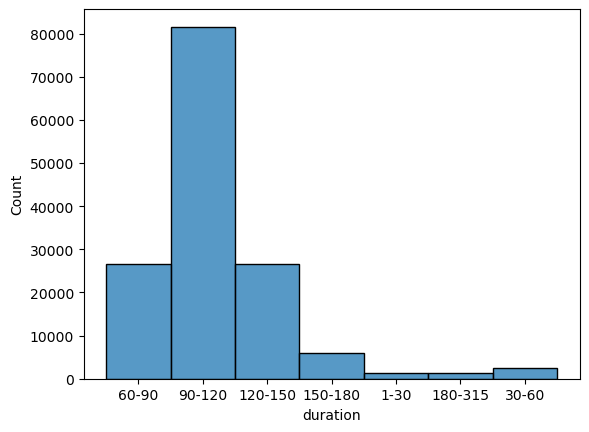

In [29]:
sns.histplot(data = df_movie.duration, bins = 7)

In [30]:
#Let's merge all movie and tv shows dataset to get back the final dataset to analyse
df_final = pd.concat([df_movie, df_tv], ignore_index = True, axis = 0)

# Exploratory Data Analysis

## Univariate Analysis

### Percent share of movies and TV shows on the Netflix

In [31]:
type_count = df_final.groupby('type')['title'].nunique()
type_count

type
Movie      6113
TV Show    2664
Name: title, dtype: int64

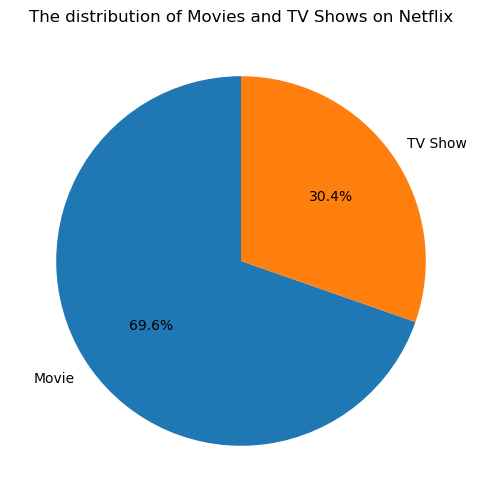

In [32]:
plt.figure(figsize=(6, 6))
plt.pie(type_count,
       labels=type_count.index,
        autopct='%1.1f%%',
       startangle=90,
       explode=(0,0))
plt.title('The distribution of Movies and TV Shows on Netflix')
plt.show()

#### Univariate Analysis

### Top 10 directors who directed maximum number movies and TV shows on the Netflix

In [33]:
director_df = df_final.groupby('director')['title'].nunique().sort_values(ascending = False).reset_index(name = 'count')
director_df = director_df.loc[director_df.director != 'Unknown Director']
director_df

,director,count
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Marcus Raboy,16
5,Suhas Kadav,16
...,...,...
4988,Brandon Camp,1
4989,Juan Antin,1
4990,Juan Antonio de la Riva,1
4991,Juan Camilo Pinzon,1


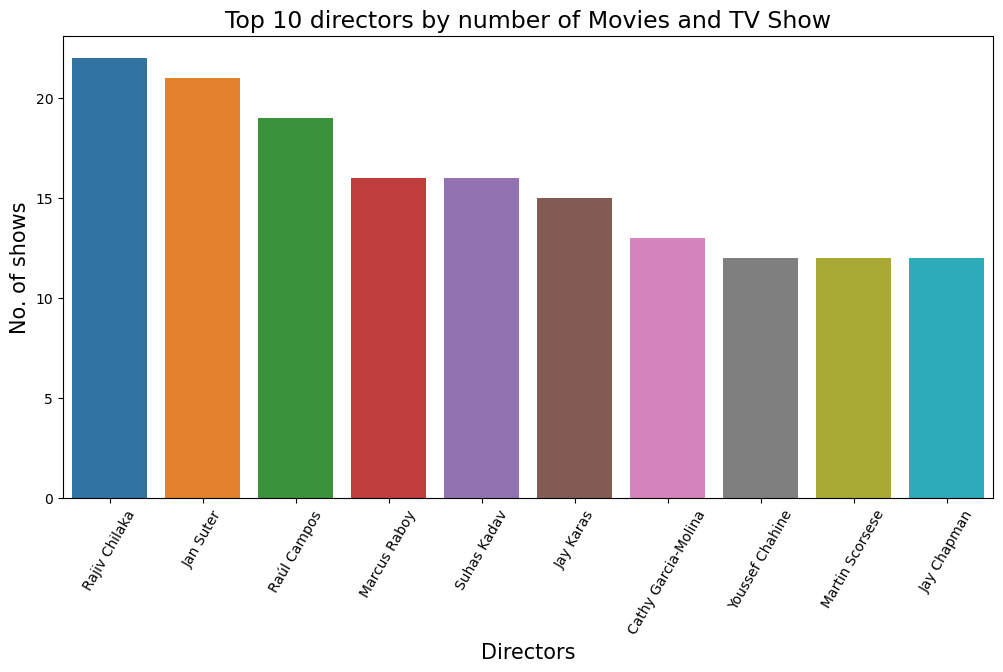

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(director_df[:10], x = 'director', y ='count')
plt.xticks(rotation=60)
plt.title('Top 10 directors by number of Movies and TV Show', fontsize=17)
plt.xlabel('Directors', fontsize=15)
plt.ylabel('No. of shows', fontsize=15)
plt.show()

In [35]:
df_movie = df_final.loc[df_final.type == 'Movie']
df_tv = df_final.loc[df_final.type == 'TV Show']

In [36]:
def unique_count(d, attribute):
    return d.groupby(attribute)['title'].nunique()

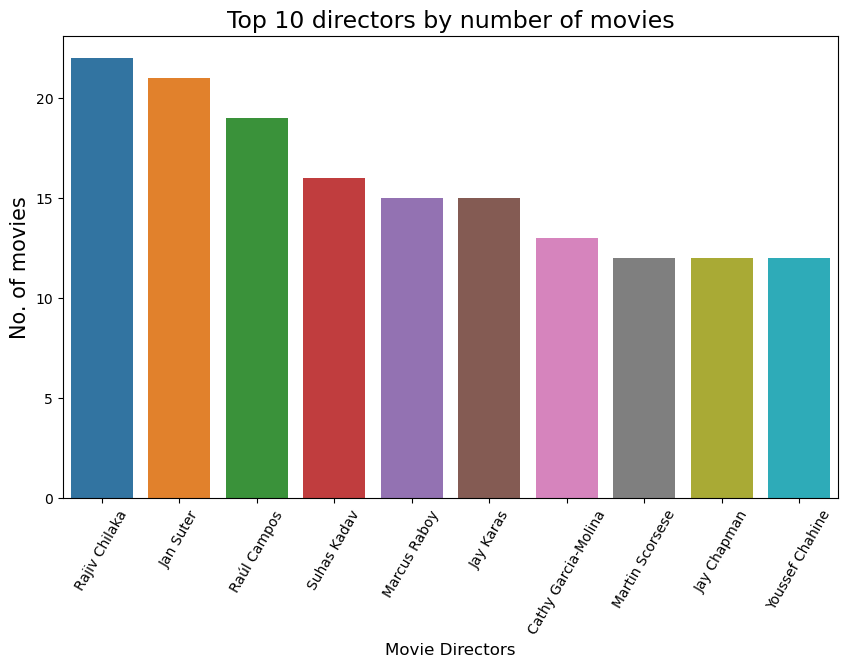

In [37]:
director_movie = unique_count(df_movie, 'director').sort_values(ascending = False).reset_index(name = "count")
director_movie = director_movie.loc[director_movie.director != 'Unknown Director']

plt.figure(figsize=(10,6))
sns.barplot(director_movie[:10], x = 'director', y ='count' )
plt.title('Top 10 directors by number of movies', fontsize=17)
plt.xlabel('Movie Directors', fontsize=12)
plt.ylabel('No. of movies', fontsize=15)
plt.xticks(rotation=60)
plt.show()

In [38]:
director_tv = unique_count(df_tv, 'director').sort_values(ascending = False).reset_index(name = "count")
director_tv = director_tv.loc[director_tv.director != 'Unknown Director']
director_tv

,director,count
1,Ken Burns,3
2,Alastair Fothergill,3
3,Stan Lathan,2
4,Joe Berlinger,2
5,Hsu Fu-chun,2
...,...,...
295,Houda Benyamina,1
296,Hong Won-ki,1
297,Hiroyuki Seshita,1
298,Hikaru Toda,1


Here, I am not plotting the barplot for top directors for TV shows. because there is only two directors who directed 3 TV shows individually and large number of directors directed 2 and 1 TV shows. 

**Insights**
- Rajiv Chilaka and Jan Suter are amongst the top movie directors who directed large number of movies
- Ken Burns and Alastair Fothergill are amongst the to TV shows directors

### Actor/actress who worked in most of the movies and TV shows on Netflix

In [39]:
cast_df = df.groupby('cast')['title'].nunique().sort_values(ascending = False).reset_index(name = 'count')
cast_df = cast_df.loc[cast_df.cast != 'Unknown Actor']
cast_df

,cast,count
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
...,...,...
36388,Jamie Lever,1
36389,Jamie Lee,1
36390,Jamie Kenna,1
36391,Jamie Kaler,1


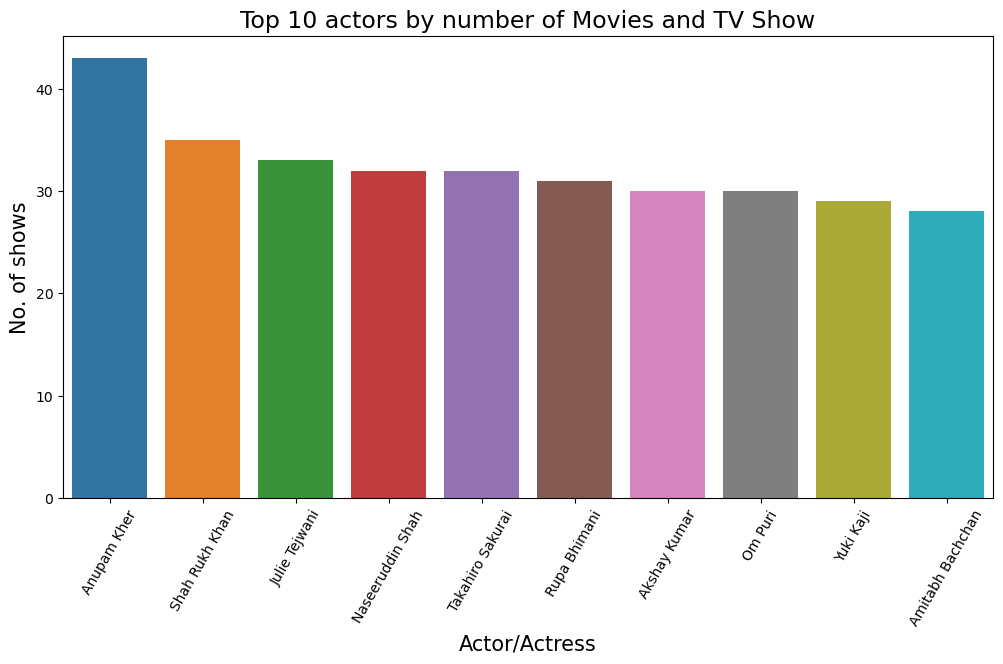

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(cast_df[:10], x = 'cast', y = 'count')
plt.xticks(rotation=60)
plt.title('Top 10 actors by number of Movies and TV Show', fontsize=17)
plt.xlabel('Actor/Actress', fontsize=15)
plt.ylabel('No. of shows', fontsize=15)
plt.show()

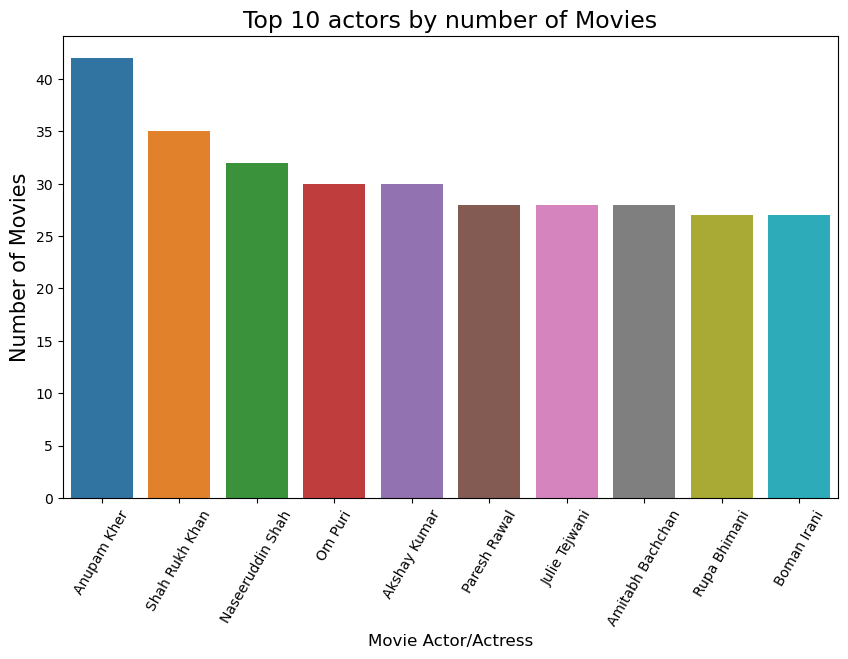

In [41]:
cast_movie = unique_count(df_movie, 'cast').sort_values(ascending = False).reset_index(name = 'count')
cast_movie = cast_movie.loc[cast_movie.cast != 'Unknown Actor']

plt.figure(figsize=(10,6))
sns.barplot(cast_movie[:10], x = 'cast', y ='count' )
plt.title('Top 10 actors by number of Movies', fontsize=17)
plt.xlabel('Movie Actor/Actress', fontsize=12)
plt.ylabel('Number of Movies', fontsize=15)
plt.xticks(rotation=60)
plt.show()

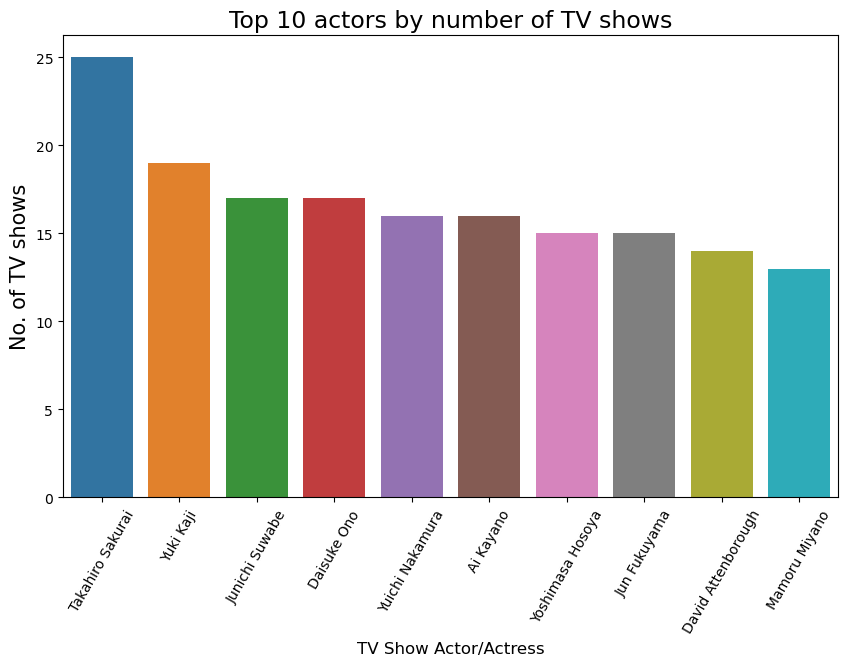

In [42]:
cast_tv = unique_count(df_tv, 'cast').sort_values(ascending = False).reset_index(name = 'count')
cast_tv = cast_tv.loc[cast_tv.cast != 'Unknown Actor']

plt.figure(figsize=(10,6))
sns.barplot(cast_tv[:10], x = 'cast', y ='count' )
plt.title('Top 10 actors by number of TV shows', fontsize=17)
plt.xlabel('TV Show Actor/Actress', fontsize=12)
plt.ylabel('No. of TV shows', fontsize=15)
plt.xticks(rotation=60)
plt.show()

### Top 10 countries in which most of the movies and TV shows are produced

In [43]:
countries_count = df.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index()
Top_10_countries = countries_count[countries_count.country != 'Unknown Country'][:10]

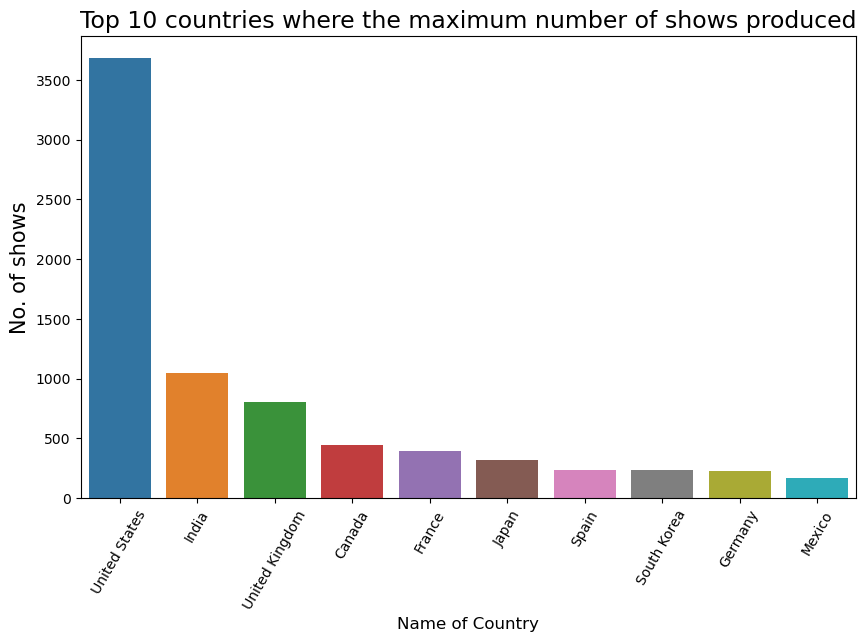

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(data = Top_10_countries, x ='country', y = 'title')
plt.title('Top 10 countries where the maximum number of shows produced', fontsize=17)
plt.xlabel('Name of Country', fontsize=12)
plt.ylabel('No. of shows', fontsize=15)
plt.xticks(rotation=60)
plt.show()

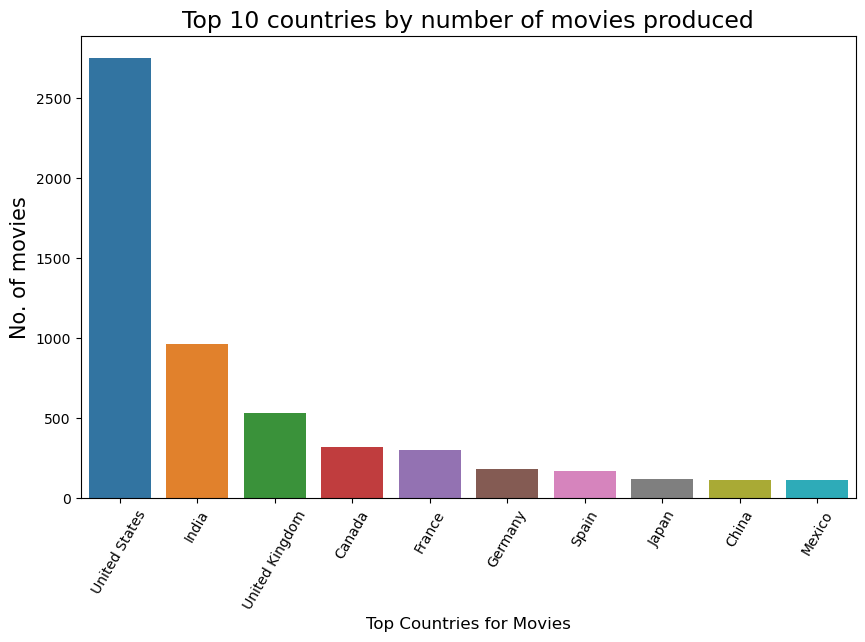

In [45]:
country_movie = unique_count(df_movie, 'country').sort_values(ascending = False).reset_index(name = 'count')
country_movie = country_movie.loc[country_movie.country != 'Unknown Country']

plt.figure(figsize=(10,6))
sns.barplot(country_movie[:10], x = 'country', y ='count' )
plt.title('Top 10 countries by number of movies produced', fontsize=17)
plt.xlabel('Top Countries for Movies', fontsize=12)
plt.ylabel('No. of movies', fontsize=15)
plt.xticks(rotation=60)
plt.show()

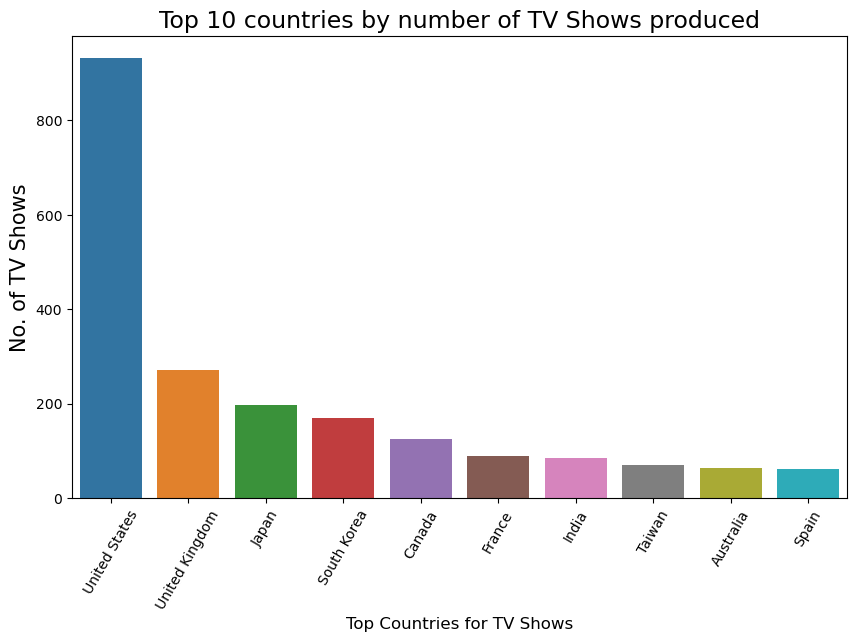

In [46]:
country_tvshow = unique_count(df_tv, 'country').sort_values(ascending = False).reset_index(name = 'count')
country_tvshow = country_tvshow.loc[country_tvshow.country != 'Unknown Country']

plt.figure(figsize=(10,6))
sns.barplot(country_tvshow[:10], x = 'country', y ='count' )
plt.title('Top 10 countries by number of TV Shows produced', fontsize=17)
plt.xlabel('Top Countries for TV Shows', fontsize=12)
plt.ylabel('No. of TV Shows', fontsize=15)
plt.xticks(rotation=60)
plt.show()

**Insights**
- Large number of Movies are produced in United States, India and United Kingdom.
- Large number of TV shows are produced in United States, United Kingdom, Japan, and South Korea.

### Top 10 genres in which most of the movies and TV shows are produced

In [47]:
genres_df = df.groupby('listed_in')['title'].nunique().sort_values(ascending = False).reset_index(name = 'count')
genres_df

,listed_in,count
0,International Movies,2738
1,Dramas,2417
2,Comedies,1673
3,International TV Shows,1349
4,Documentaries,869
5,Action & Adventure,854
6,TV Dramas,762
7,Independent Movies,756
8,Children & Family Movies,639
9,Romantic Movies,615


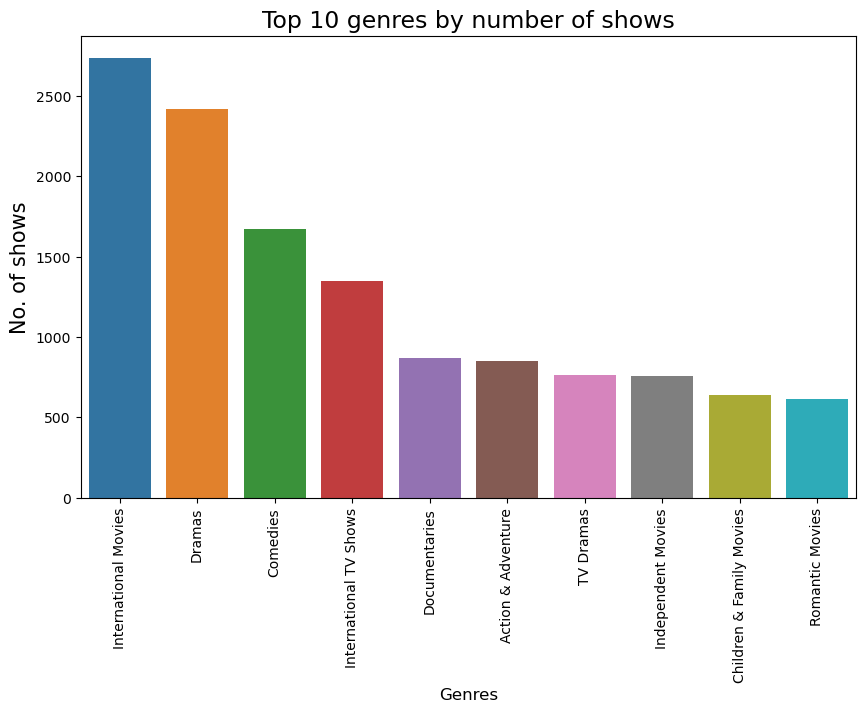

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(data = genres_df[:10], x ='listed_in', y = 'count')
plt.title('Top 10 genres by number of shows', fontsize=17)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('No. of shows', fontsize=15)
plt.xticks(rotation=90)
plt.show()

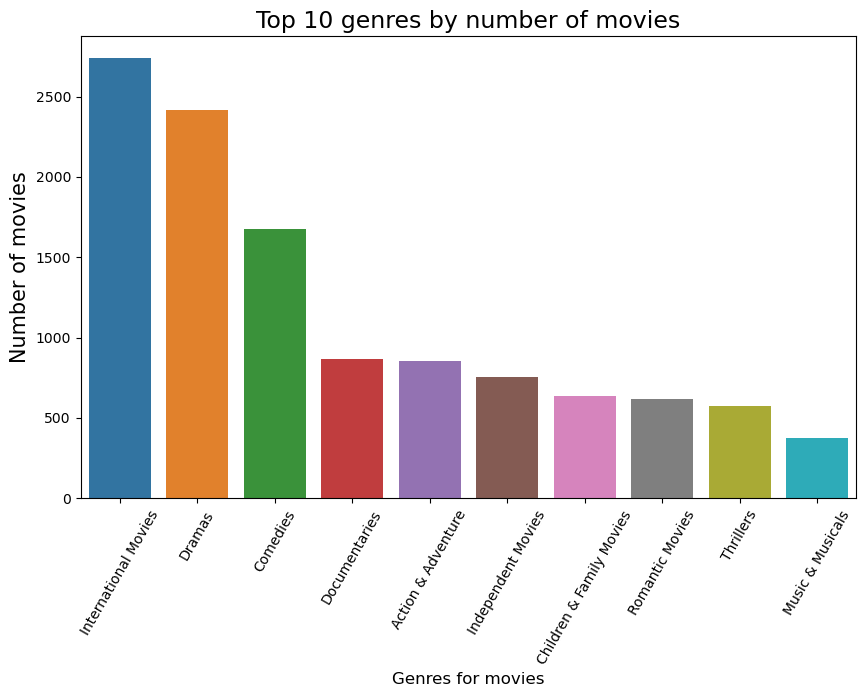

In [49]:
genre_movie = unique_count(df_movie, 'listed_in').sort_values(ascending = False).reset_index(name = 'count')

plt.figure(figsize=(10,6))
sns.barplot(genre_movie[:10], x = 'listed_in', y ='count' )
plt.title('Top 10 genres by number of movies', fontsize=17)
plt.xlabel('Genres for movies', fontsize=12)
plt.ylabel('Number of movies', fontsize=15)
plt.xticks(rotation=60)
plt.show()

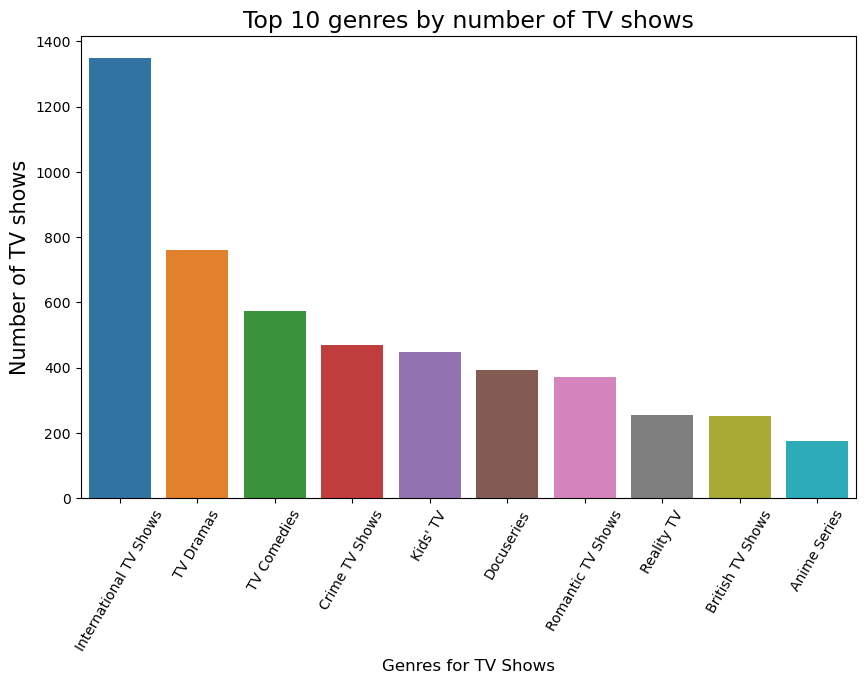

In [50]:
genre_tvshow = unique_count(df_tv, 'listed_in').sort_values(ascending = False).reset_index(name = 'count')

plt.figure(figsize=(10,6))
sns.barplot(genre_tvshow[:10], x = 'listed_in', y ='count' )
plt.title('Top 10 genres by number of TV shows', fontsize=17)
plt.xlabel('Genres for TV Shows', fontsize=12)
plt.ylabel('Number of TV shows', fontsize=15)
plt.xticks(rotation=60)
plt.show()

**Insights**
- Most of the Movies and TV shows are International, Dramas and Comedies category

### Best Time to add shows to the platform

In [51]:
yr_df = df_final.groupby('year_added')['title'].nunique().sort_values(ascending = False).reset_index(name = 'count of movies/shows')
yr_df

,year_added,count of movies/shows
0,2019,2010
1,2020,1877
2,2018,1648
3,2021,1495
4,2017,1182
5,2016,428
6,2015,82
7,2014,24
8,2011,13
9,2013,11


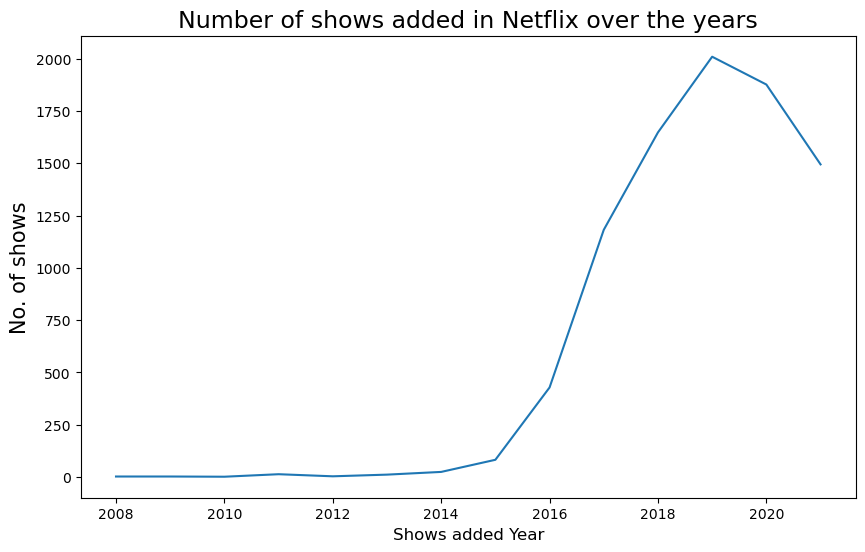

In [52]:
plt.figure(figsize=(10,6))
sns.lineplot(yr_df, x='year_added', y = 'count of movies/shows')
plt.title('Number of shows added in Netflix over the years', fontsize=17)
plt.xlabel('Shows added Year', fontsize=12)
plt.ylabel('No. of shows', fontsize=15)
#plt.xticks(rotation=90)
plt.show()

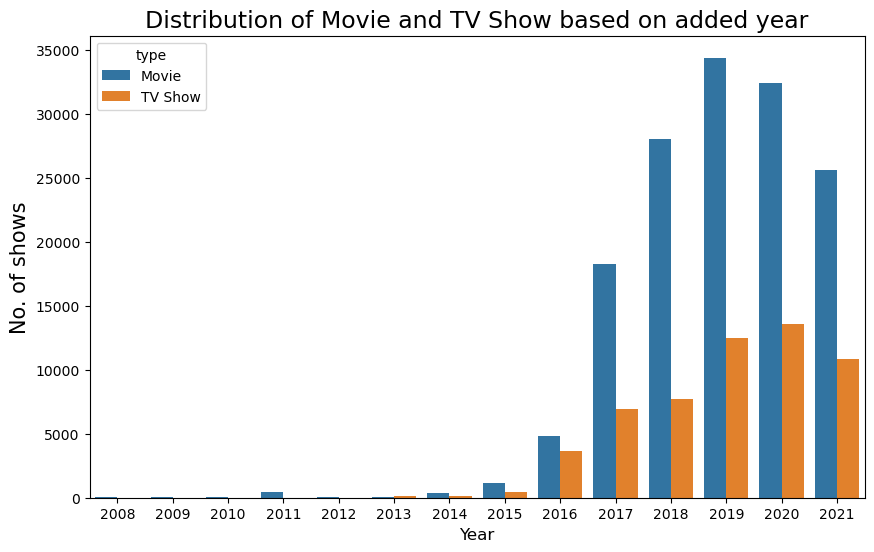

In [53]:
yr_movies = df_movie.groupby('year_added')['title'].nunique().sort_values(ascending = False).reset_index()
plt.figure(figsize=(10,6))
sns.countplot(df_final, x='year_added', hue = 'type')
plt.title('Distribution of Movie and TV Show based on added year', fontsize=17)
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of shows', fontsize=15)
plt.show()

**Insights**

- Netflix contains large number of movie content than the TV shows
- Content addition on the platform increased drastically from year 2015.
- year 2019 has seen peak in content addition on the platform, which gradually deacreased after it.
- Large number of movies are added in the year 2019, while TV shows were added in year 2019, 2020

In [54]:
month_df = df_final.groupby('month_added')['title'].nunique().sort_values(ascending = False).reset_index()
month_df

,month_added,title
0,July,827
1,December,812
2,September,769
3,April,764
4,October,758
5,August,747
6,March,741
7,January,737
8,June,726
9,November,705


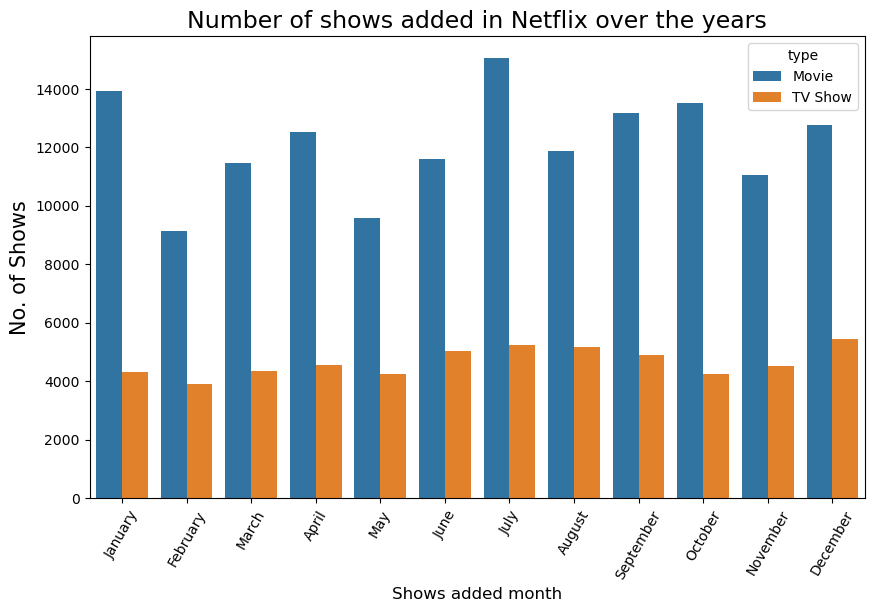

In [55]:
month_order = ['January', 'February', 'March', 'April', 'May', 
             'June', 'July', 'August', 'September', 
             'October', 'November', 'December']
plt.figure(figsize=(10,6))
sns.countplot(df_final, x='month_added', order = month_order, hue = 'type')
plt.title('Number of shows added in Netflix over the years', fontsize=17)
plt.xlabel('Shows added month', fontsize=12)
plt.ylabel('No. of Shows', fontsize=15)
plt.xticks(rotation=60)
plt.show()

**Insights:**
- Maximum number of shows (both movies and TV shows combined) were added in the month of **July** and **December**. 
- In the bar plot showing the combined result, there is peak after every two months. Peaks are seen in January, April, July, September and December.
- Large number of **movies** were added in the Month of **July, December and January**
- Large number of **TV shows** are added in the month of **July, September and December**

In [56]:
wa = df_final.groupby('week_added')['title'].nunique().sort_values(ascending = False).reset_index()
wa

,week_added,title
0,38,372
1,48,318
2,52,287
3,8,268
4,13,266
5,4,263
6,30,253
7,26,250
8,12,240
9,21,234


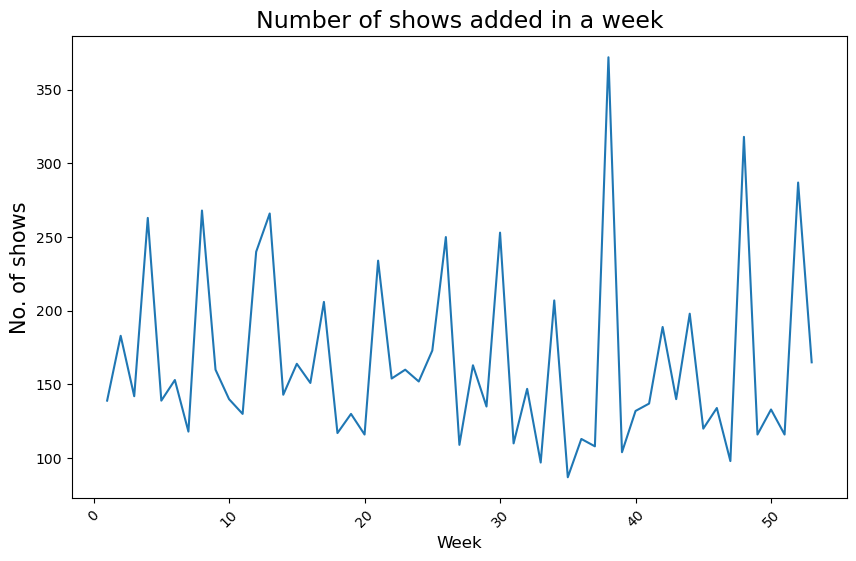

In [57]:
plt.figure(figsize=(10,6))
sns.lineplot(wa, x='week_added', y = 'title')
plt.title('Number of shows added in a week', fontsize=17)
plt.xlabel('Week', fontsize=12)
plt.ylabel('No. of shows', fontsize=15)
plt.xticks(rotation=45)
plt.show()

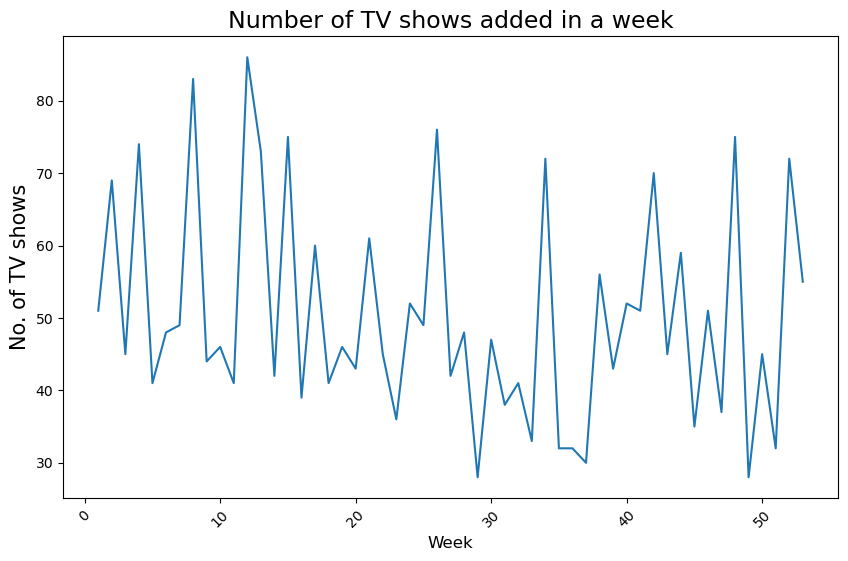

In [58]:
week_tv = unique_count(df_tv, 'week_added').sort_values(ascending = False).reset_index(name = 'count')
plt.figure(figsize=(10,6))
sns.lineplot(week_tv, x='week_added', y = 'count')
plt.title('Number of TV shows added in a week', fontsize=17)
plt.xlabel('Week', fontsize=12)
plt.ylabel('No. of TV shows', fontsize=15)
plt.xticks(rotation=45)
plt.show()

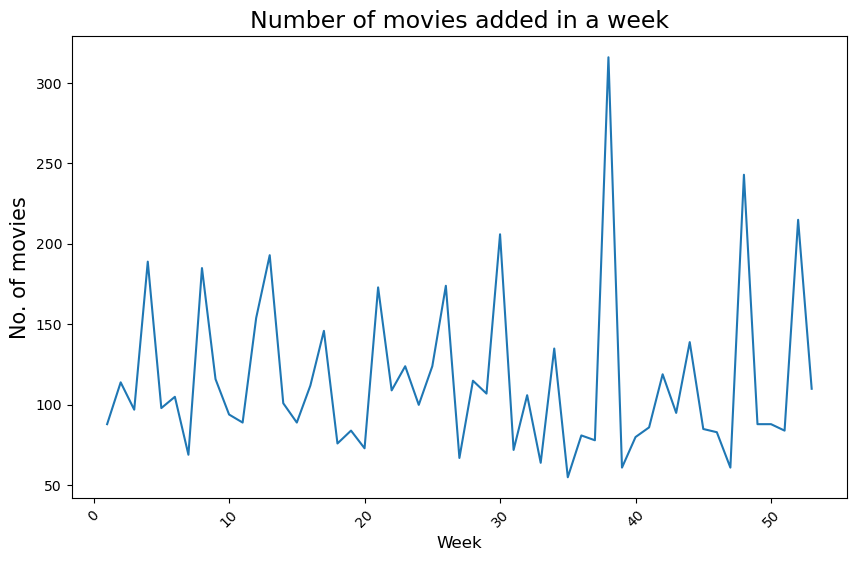

In [59]:
week_movie = unique_count(df_movie, 'week_added').sort_values(ascending = False).reset_index(name = 'count')
plt.figure(figsize=(10,6))
sns.lineplot(week_movie, x='week_added', y = 'count')
plt.title('Number of movies added in a week', fontsize=17)
plt.xlabel('Week', fontsize=12)
plt.ylabel('No. of movies', fontsize=15)
plt.xticks(rotation=45)
plt.show()

**Insights**
- Most of the content(both TV shows and Movies combined) were added in week **38 and 48** which generally falls in mid of **September** and toward end of **November**, respectively. 
- Most TV shows were added in **week 8 and week 12**, while most movies were added in week 38 and 48.

### No of movies and TV shows released over the years

In [60]:
df_final.groupby('release_year')['title'].nunique().sort_values(ascending = False).reset_index(name = 'count')

,release_year,count
0,2018,1145
1,2017,1029
2,2019,1023
3,2020,953
4,2016,901
...,...,...
69,1959,1
70,1961,1
71,1947,1
72,1966,1


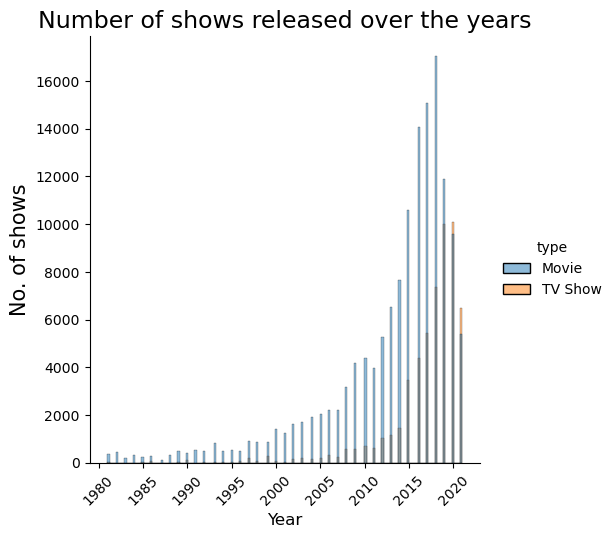

In [61]:
#plt.figure(figsize=(12,6))
sns.displot(df_final[df_final.release_year > 1980], x='release_year', hue = 'type')
plt.title('Number of shows released over the years', fontsize=17)
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of shows', fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [62]:
df['year_diff'] = df['year_added'] - df['release_year']
df.year_diff.mode()

0    0
Name: year_diff, dtype: int64

**Insights**
- On Netflix, there is large number of content which is released after the year 2000.
- In recent times, popularity of TV Shows is increasing than the movies, hence large number of TV shows are being released than the movies
- Most of content released in a year is getting added on the platform or most of the new content in released on the Netflix platform.

In [63]:
duration_df = df_final.groupby('duration')['title'].nunique().sort_values(ascending = False).reset_index(name = 'count')
duration_df

,duration,count
0,90-120,2992
1,1 Season,1791
2,60-90,1506
3,120-150,891
4,2 Seasons,421
5,30-60,355
6,3 Seasons,198
7,150-180,194
8,1-30,130
9,4 Seasons,94


In [64]:
dur_tv = unique_count(df_tv, 'duration').sort_values(ascending = False).reset_index(name = 'count')

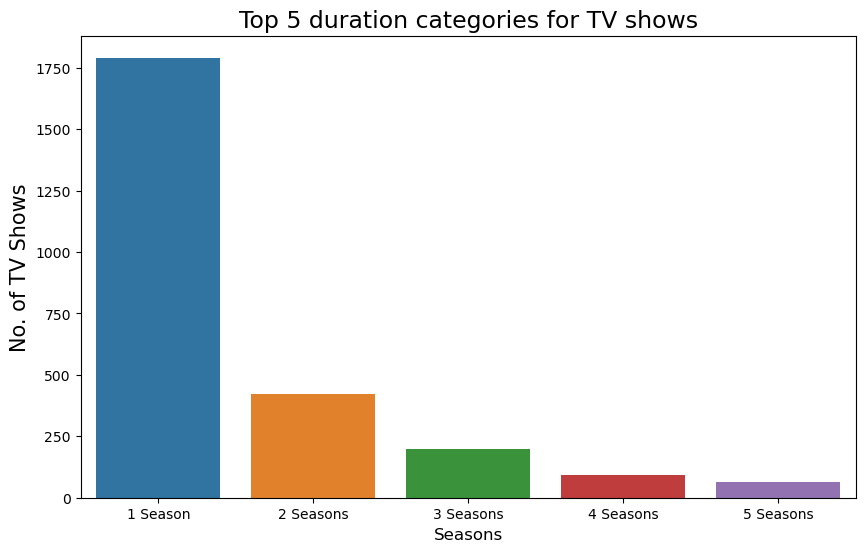

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(dur_tv[:5], x = 'duration', y = 'count')
plt.title('Top 5 duration categories for TV shows', fontsize=17)
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('No. of TV Shows', fontsize=15)
#plt.xticks(rotation=90)
plt.show()

In [66]:
dur_movie = unique_count(df_movie, 'duration').sort_values(ascending = False).reset_index(name = 'count')
dur_movie

,duration,count
0,90-120,2992
1,60-90,1506
2,120-150,891
3,30-60,355
4,150-180,194
5,1-30,130
6,180-315,47


**Insights**
- There is large number of TV shows which are recently released and have 1 or 2 seasons. Very few have seasons up to 17 as well.
- Large number of movies are of duration 1.5hrs to 2hrs, which is like best time to keep audience seated in one go. 
- There is very small number of movies with duration less than 30mins as well as more than 3hrs.

### Top 10 ratings for movies and TV shows

In [67]:
df_rating = df_final.groupby('rating')['title'].nunique().sort_values(ascending = False).reset_index(name = 'count')
df_rating

,rating,count
0,TV-MA,3202
1,TV-14,2148
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,304
7,PG,287
8,TV-G,220
9,NR,82


In [68]:
df_tv.rating.value_counts()

TV-MA       29874
TV-14       14619
TV-PG        4601
TV-Y7        3808
TV-Y         1786
TV-G         1041
NR            125
R              54
TV-Y7-FV       24
Name: rating, dtype: int64

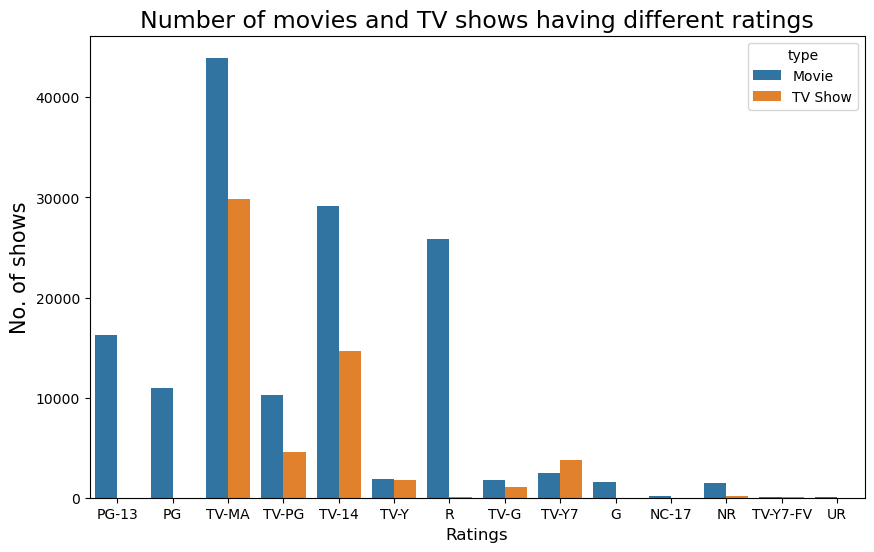

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(df_final, x='rating', hue = 'type')
plt.title('Number of movies and TV shows having different ratings', fontsize=17)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('No. of shows', fontsize=15)
#plt.xticks(rotation=90)
plt.show()

**Insights**
- For both TV Shows and movies, content with rating TV-MA that means mature audience and TV-14 that means audience with age>14 that is teens and adults are more.

### Bi-variate Analysis

For bi-variate analysis, let's take top countries and analyze the data with different categories

- For Movies: United States, India, United Kingdom
- For TV Shows: United States, United Kingdom, Japan, South Korea

In [70]:
usa_df = df_final.loc[(df_final.country == 'United States')]
india_df = df_final.loc[(df_final.country == 'India')]
uk_df = df_final.loc[(df_final.country == 'United Kingdom')]
japan_df = df_final.loc[(df_final.country == 'Japan')]
sk_df = df_final.loc[(df_final.country == 'South Korea')]

In [71]:
#For movies
usa_movie = usa_df.loc[usa_df.type == 'Movie']
uk_movie = uk_df.loc[uk_df.type == 'Movie']
india_movie = india_df.loc[india_df.type == 'Movie']

In [72]:
#For tv shows
usa_tv = usa_df.loc[usa_df.type == 'TV Show']
uk_tv = uk_df.loc[uk_df.type == 'TV Show']
japan_tv = japan_df.loc[japan_df.type == 'TV Show']
sk_tv = sk_df.loc[sk_df.type == 'TV Show']

In [73]:
# to plot the graph for movies
usa = usa_movie.groupby('year_added')['title'].nunique().reset_index(name = 'count')
india = india_movie.groupby('year_added')['title'].nunique().reset_index(name = 'count')
uk = uk_movie.groupby('year_added')['title'].nunique().reset_index(name = 'count')

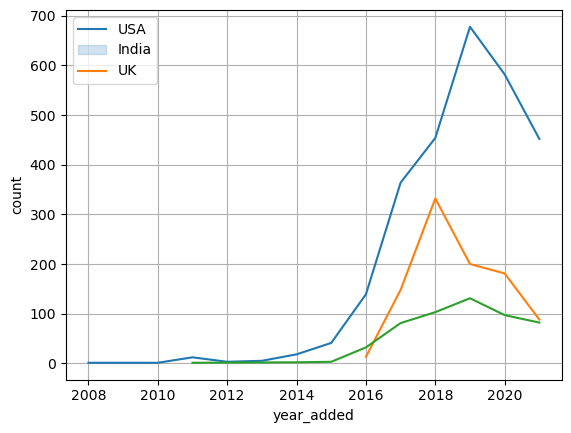

In [74]:
sns.lineplot(data=usa, x='year_added', y='count')
sns.lineplot(data=india, x='year_added', y='count')
sns.lineplot(data=uk, x='year_added', y='count')
plt.legend(['USA', 'India', 'UK'], loc='upper left')
plt.grid()
plt.show()

In [75]:
usa = usa_tv.groupby('year_added')['title'].nunique().reset_index(name = 'count')
uk = uk_tv.groupby('year_added')['title'].nunique().reset_index(name = 'count')
japan = japan_tv.groupby('year_added')['title'].nunique().reset_index(name = 'count')
sk = sk_tv.groupby('year_added')['title'].nunique().reset_index(name = 'count')

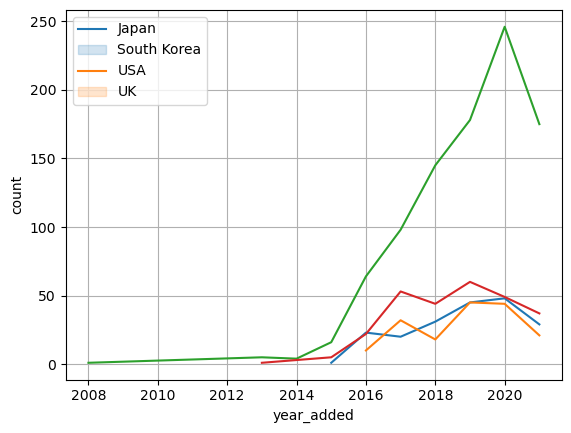

In [76]:
sns.lineplot(data=japan, x='year_added', y='count')
sns.lineplot(data=sk, x='year_added', y='count')
sns.lineplot(data=usa, x='year_added', y='count')
sns.lineplot(data=uk, x='year_added', y='count')
plt.legend(['Japan', 'South Korea', 'USA', 'UK'], loc='upper left')
plt.grid()
plt.show()

**Insights**
- No. of content both movies and tv shows has seen peak towards 2018-2020, but after that it is decreasing.

#### Best actor-director combination

**USA**

In [77]:
usa_actor_director = usa_df.groupby(['director', 'cast'])['title'].nunique().sort_values(ascending = False).reset_index()
usa_actor_director = usa_actor_director[(usa_actor_director.director != 'Unknown Director')]
usa_actor_director = usa_actor_director[(usa_actor_director.cast != 'Unknown Actor')]
usa_actor_director 

,director,cast,title
27,Ishi Rudell,Rebecca Shoichet,5
28,Ishi Rudell,Ashleigh Ball,5
29,Ishi Rudell,Andrea Libman,5
34,Ishi Rudell,Tabitha St. Germain,5
35,Ishi Rudell,Tara Strong,5
...,...,...,...
28099,Jesse Warn,David St. Louis,1
28100,Jesse Warn,David Harewood,1
28101,Jesse Warn,Chyler Leigh,1
28102,Jesse Warn,Calista Flockhart,1


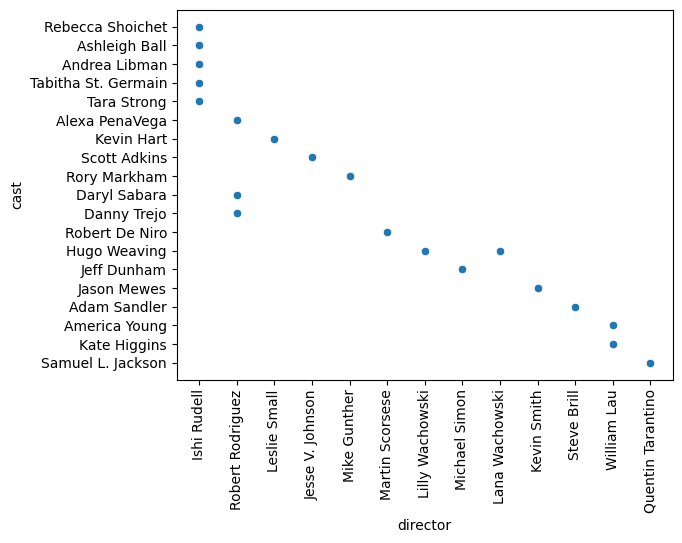

In [78]:
sns.scatterplot(data=usa_actor_director[:20], x='director', y='cast')
plt.xticks(rotation = 90)
plt.show()

**India**

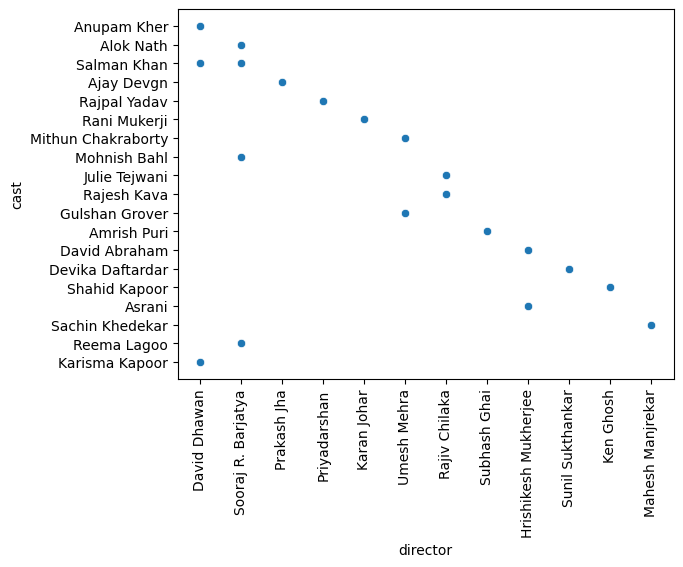

In [79]:
india_actor_director = india_df.groupby(['director', 'cast'])['title'].nunique().sort_values(ascending = False).reset_index()
india_actor_director = india_actor_director[(india_actor_director.director != 'Unknown Director')]
india_actor_director = india_actor_director[(india_actor_director.cast != 'Unknown Actor')]
sns.scatterplot(data=india_actor_director[:20], x='director', y='cast')
plt.xticks(rotation = 90)
plt.show()

**UK**

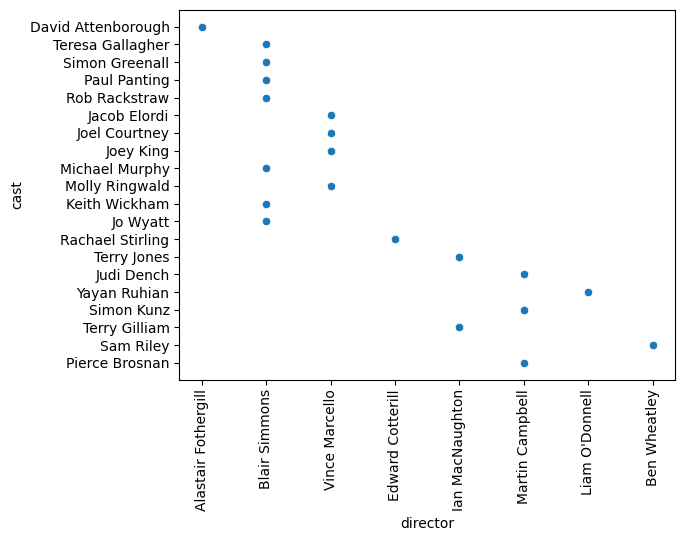

In [80]:
uk_actor_director = uk_df.groupby(['director', 'cast'])['title'].nunique().sort_values(ascending = False).reset_index()
uk_actor_director = uk_actor_director[(uk_actor_director.director != 'Unknown Director')]
uk_actor_director = uk_actor_director[(uk_actor_director.cast != 'Unknown Actor')]
sns.scatterplot(data=uk_actor_director[:20], x='director', y='cast')
plt.xticks(rotation = 90)
plt.show()

In [81]:
uk_actor_director

,director,cast,title
12,Alastair Fothergill,David Attenborough,4
19,Blair Simmons,Teresa Gallagher,3
20,Blair Simmons,Simon Greenall,3
21,Blair Simmons,Paul Panting,3
22,Blair Simmons,Rob Rackstraw,3
...,...,...,...
5350,Jonathan Teplitzky,Stellan Skarsgård,1
5351,Jonathan Teplitzky,Sam Reid,1
5352,Jonathan Teplitzky,Nicole Kidman,1
5353,Jonathan Teplitzky,Michael MacKenzie,1


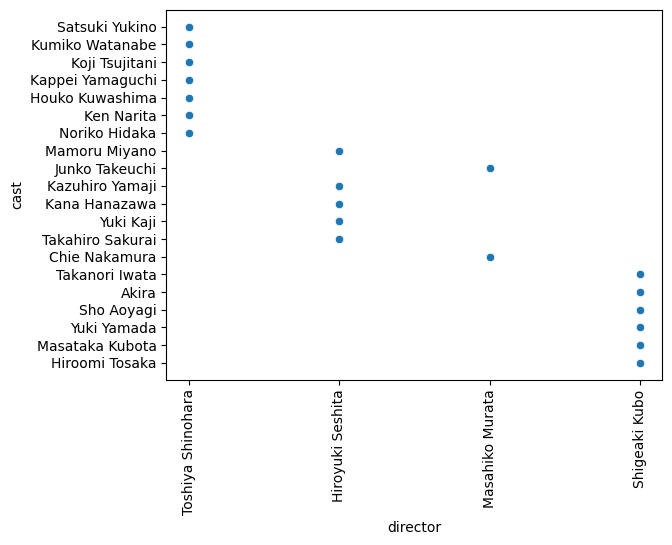

In [82]:
japan_actor_director = japan_df.groupby(['director', 'cast'])['title'].nunique().sort_values(ascending = False).reset_index()
japan_actor_director = japan_actor_director[(japan_actor_director.director != 'Unknown Director')]
japan_actor_director = japan_actor_director[(japan_actor_director.cast != 'Unknown Actor')]
sns.scatterplot(data=japan_actor_director[:20], x='director', y='cast')
plt.xticks(rotation = 90)
plt.show()

In [83]:
japan_actor_director

,director,cast,title
40,Toshiya Shinohara,Satsuki Yukino,7
42,Toshiya Shinohara,Kumiko Watanabe,7
43,Toshiya Shinohara,Koji Tsujitani,7
48,Toshiya Shinohara,Kappei Yamaguchi,7
49,Toshiya Shinohara,Houko Kuwashima,7
...,...,...,...
2463,Robert Vince,Jed Ress,1
2464,Robert Vince,George Newbern,1
2465,Robert Vince,Diedrich Bader,1
2466,Robert Vince,Denisse Ojeda,1


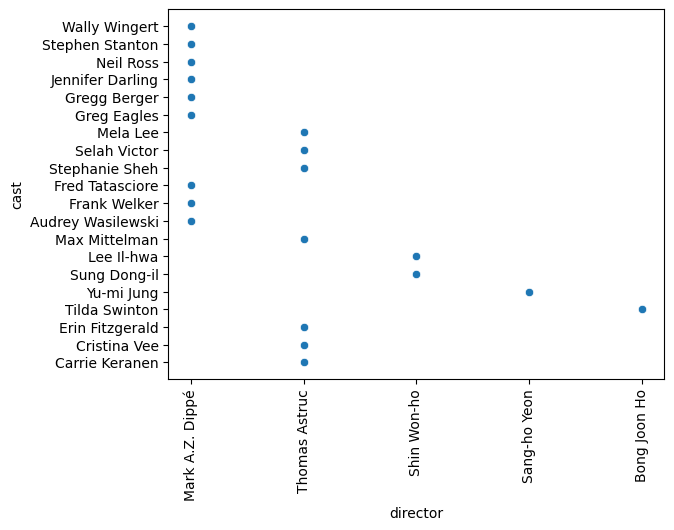

In [84]:
sk_actor_director = sk_df.groupby(['director', 'cast'])['title'].nunique().sort_values(ascending = False).reset_index()
sk_actor_director = sk_actor_director[(sk_actor_director.director != 'Unknown Director')]
sk_actor_director = sk_actor_director[(sk_actor_director.cast != 'Unknown Actor')]
sns.scatterplot(data=sk_actor_director[:20], x='director', y='cast')
plt.xticks(rotation = 90)
plt.show()

**Business Recommendations for Netflix**

After analyzing the data, the following final insights can be inferred
- In recent times (From 2020), large number of TV shows are being released than the movies. Netflix can invest more on TV shows.
- TV shows has multiple seasons which keeps the audience visiting the platform for number of times. There is a business opportunity to bring more number of seasons of popular TV shows. 
- The countries such as UN, India, UK, Japan have large number of shows (both movies and TV shows) produced, while countries such as South Korea, France, Germany, Canada are growing. 
- Content in International, drama, comedy, crime genre are most popular while Kids TV, action, documentaries genre are growing.
- Best time to add the content on the platform is every two months with most popular months are February, July, September, December, etc. 
- Add TV Shows in July/August and Movies in last week of the year/first month of the next year.
- TV-MA and TV-14 have large number of audience while Kids and general rating categories are growing. 